In [3]:
import json
import requests
from pprint import pprint
# from config import api_key
from pygments import highlight, lexers, formatters
import pandas as pd
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import scipy.stats as st
import gmaps
import gmaps.datasets
import gmaps.geojson_geometries

In [6]:
## Data from https://rapidapi.com/

# make a call to the URL 
url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api"

# pass key and host login
headers = {
    'x-rapidapi-host': "corona-virus-world-and-india-data.p.rapidapi.com",
    'x-rapidapi-key': "mNTV7WxSsqmshvTYBNiZHBqh6x8Wp1gRwifjsnRj6RKhp8LeTb"
    }

# Store the information from the GET call into the "response" variable
response = requests.request("GET", url, headers=headers)
pprint(response.json())

results = response.json()
# print(results["countries_stat"])
# convert JSON into a python dictorinary format in order to read/loop through it.
# results = response.json()

# Print result to confirm
# pprint(results["countries_stat"])

# create for loop to get each result from countries stat which is the main key of the JSON
for key in results["countries_stat"]:
    print(key["country_name"])


{'countries_stat': [{'active_cases': '732,468',
                     'cases': '866,148',
                     'country_name': 'USA',
                     'deaths': '48,868',
                     'deaths_per_1m_population': '148',
                     'new_cases': '17,431',
                     'new_deaths': '1,209',
                     'region': '',
                     'serious_critical': '14,344',
                     'tests_per_1m_population': '13,353',
                     'total_cases_per_1m_population': '2,617',
                     'total_recovered': '84,812',
                     'total_tests': '4,419,921'},
                    {'active_cases': '101,617',
                     'cases': '213,024',
                     'country_name': 'Spain',
                     'deaths': '22,157',
                     'deaths_per_1m_population': '474',
                     'new_cases': '4,635',
                     'new_deaths': '440',
                     'region': '',
                     's

                     'serious_critical': '10',
                     'tests_per_1m_population': '5,386',
                     'total_cases_per_1m_population': '514',
                     'total_recovered': '659',
                     'total_tests': '15,960'},
                    {'active_cases': '370',
                     'cases': '1,451',
                     'country_name': 'New Zealand',
                     'deaths': '16',
                     'deaths_per_1m_population': '3',
                     'new_cases': '3',
                     'new_deaths': '2',
                     'region': '',
                     'serious_critical': '2',
                     'tests_per_1m_population': '21,002',
                     'total_cases_per_1m_population': '301',
                     'total_recovered': '1,065',
                     'total_tests': '101,277'},
                    {'active_cases': '874',
                     'cases': '1,413',
                     'country_name': 'Bosnia and Herzego

                     'country_name': 'Paraguay',
                     'deaths': '9',
                     'deaths_per_1m_population': '1',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '1',
                     'tests_per_1m_population': '882',
                     'total_cases_per_1m_population': '30',
                     'total_recovered': '67',
                     'total_tests': '6,292'},
                    {'active_cases': '9',
                     'cases': '187',
                     'country_name': 'Faeroe Islands',
                     'deaths': '0',
                     'deaths_per_1m_population': '0',
                     'new_cases': '2',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '130,467',
                     'total_cases_per_1m_population

                     'deaths': '0',
                     'deaths_per_1m_population': '0',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '0',
                     'total_cases_per_1m_population': '11,236',
                     'total_recovered': '2',
                     'total_tests': '0'},
                    {'active_cases': '7',
                     'cases': '9',
                     'country_name': 'MS Zaandam',
                     'deaths': '2',
                     'deaths_per_1m_population': '0',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '0',
                     'total_cases_per_1m_population': '0',
                     'total_recovered': '0',
           

In [7]:
# create a DataFrame from scratch (temporary to test)
                          
# create variable to hold the value belonging to each key in the dataset
countries = []
cases = []
total_recovered = []
serious_critical = []

# total_tests = []

# for loop to store the data for each key
for key in results["countries_stat"]:
    countries.append(key["country_name"])
    cases.append(key["cases"])
    total_recovered.append(key["total_recovered"])
    serious_critical.append(key["serious_critical"])
    #total_tests.append(key["total_tests"])
    
# print(countries)

In [8]:
# Store dataframe into variable permanent
compare_data = pd.DataFrame(columns=["Country", "Total Cases", "Total Recovered", "Serious Critical"])
compare_data["Country"] = countries
compare_data["Total Cases"] = cases
compare_data["Total Recovered"] = total_recovered
compare_data["Serious Critical"] = serious_critical
df = pd.DataFrame(compare_data, columns = ['Country', 'Total Cases', 'Total Recovered', 'Serious Critical'])
df
# data['Total tests'] = total_tests
compare_data.head()

,Country,Total Cases,Total Recovered,Serious Critical
0,USA,"866,148","84,812","14,344"
1,Spain,"213,024","89,250","7,705"
2,Italy,"189,973","57,576","2,267"
3,France,"161,530","42,088","5,053"
4,Germany,"151,285","103,300","2,908"


In [9]:
#toptwenty = deaths_df.iloc[0:20]
compare_data["Total Recovered"] = compare_data["Total Recovered"].str.replace("N/A","0")
compare_data["Total Recovered"] = compare_data["Total Recovered"].str.replace(",","").astype(float)
compare_data["Total Cases"] = compare_data["Total Cases"].str.replace(",","").astype(float)
compare_data["Serious Critical"] = compare_data["Serious Critical"].str.replace(",","").astype(float)
total_recovered = compare_data.iloc[0:10]
total_recovered.head(20)

,Country,Total Cases,Total Recovered,Serious Critical
0,USA,866148.0,84812.0,14344.0
1,Spain,213024.0,89250.0,7705.0
2,Italy,189973.0,57576.0,2267.0
3,France,161530.0,42088.0,5053.0
4,Germany,151285.0,103300.0,2908.0
5,UK,138078.0,0.0,1559.0
6,Turkey,101790.0,18491.0,1816.0
7,Iran,87026.0,64843.0,3105.0
8,China,82798.0,77207.0,63.0
9,Russia,62773.0,4891.0,2300.0


<IPython.core.display.Javascript object>


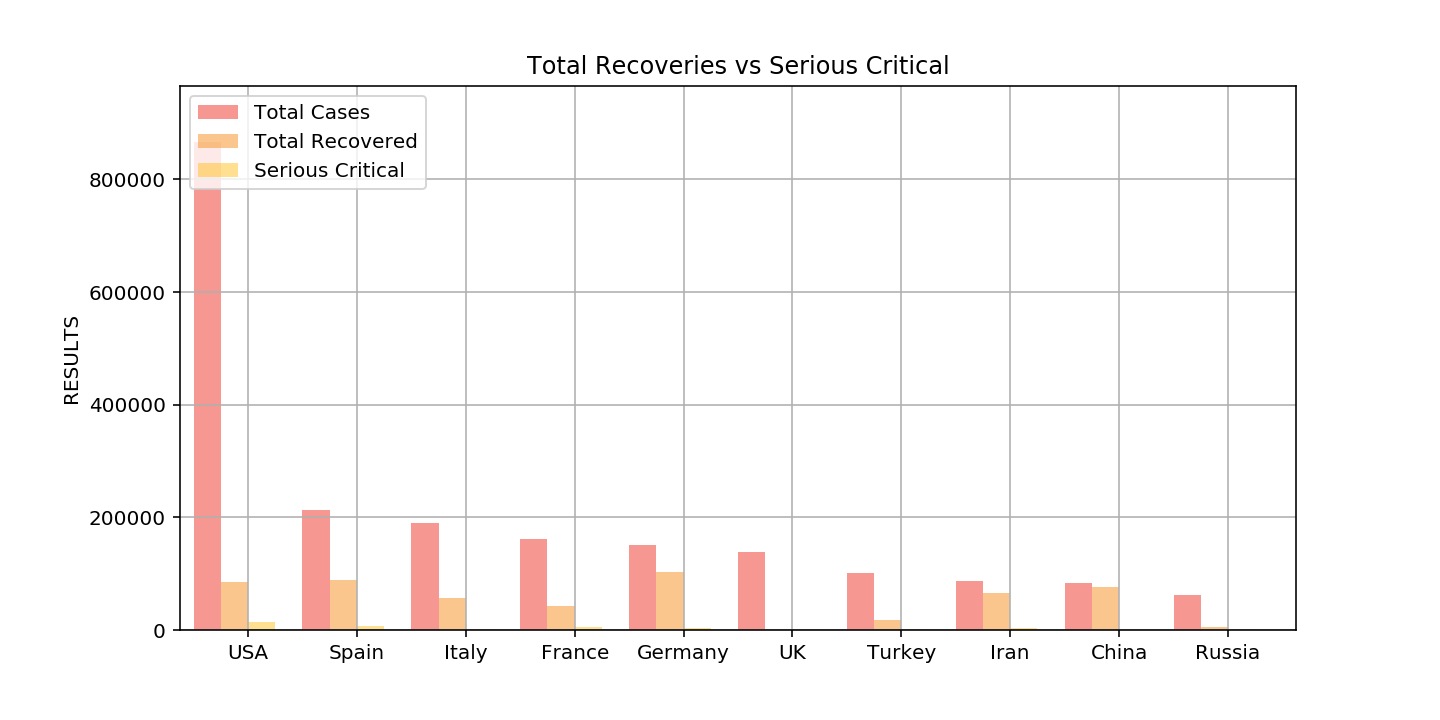

In [13]:
# Setting the positions and width for the bars
pos = list(range(len(total_recovered['Total Cases']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        total_recovered['Total Cases'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=total_recovered['Country'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        total_recovered['Total Recovered'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=total_recovered['Country'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        total_recovered['Serious Critical'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=total_recovered['Country'][2]) 

# Set the y axis label
ax.set_ylabel('RESULTS')

# Set the chart's title
ax.set_title('Total Recoveries vs Serious Critical')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(total_recovered['Country'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(total_recovered['Total Cases'] + total_recovered['Total Recovered'] + total_recovered['Serious Critical'])] )

# Adding the legend and showing the plot
plt.legend(['Total Cases', 'Total Recovered', 'Serious Critical'], loc='upper left')
plt.grid()
plt.show()


In [14]:
plt.savefig('imagename')